In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
dataframe=pd.read_csv("./weatherDaNang_2019.csv")
dataset_test_temp = pd.read_csv('./60timesbefore3103.csv')
dataset_test_humi = pd.read_csv('./60timesbefore3103.csv')

In [3]:
dataset_temp = dataframe.iloc[:,1:2].values
dataset_humi = dataframe.iloc[:,2:3].values
input_temp = dataset_test_temp.iloc[:,1:2].values
input_humi = dataset_test_humi.iloc[:,2:3].values

sc = MinMaxScaler(feature_range = (0, 1))

In [4]:
def Temperature_Forecast_Model(dataset_temp):
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_scaled = sc.fit_transform(dataset_temp)
    features_train = []
    labels_train = []
    #60 timesteps and 1 output
    for i in range(60, len(dataset_temp)):
        features_train.append(dataset_scaled[i-60:i, 0]) 
        labels_train.append(dataset_scaled[i, 0])
    features_train, labels_train = np.array(features_train), np.array(labels_train)
    features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1]))
    model = LinearRegression().fit(features_train, labels_train)
    return model


In [5]:
def Humidity_Forecast_Model(dataset_humi):
    sc = MinMaxScaler(feature_range = (0, 1))
    dataset_scaled = sc.fit_transform(dataset_humi)
    features_train = []
    labels_train = []
    #60 timesteps and 1 output
    for i in range(60, len(dataset_humi)):
        features_train.append(dataset_scaled[i-60:i, 0]) 
        labels_train.append(dataset_scaled[i, 0])
    features_train, labels_train = np.array(features_train), np.array(labels_train)
    features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1]))
    model = LinearRegression().fit(features_train, labels_train)
    return model

In [6]:
dataset_scaled = sc.fit_transform(dataset_temp)
input_temp = input_temp.reshape(-1,1)
#chuan hoa de dua vao model
input_temp = sc.transform(input_temp)

In [7]:
count=0
lsttemperature_forecast=[]
while count < 24: #predict 24 giờ forward
  input_temp = input_temp.reshape(-1,1)
  features_test = []
  features_test.append(input_temp)
  features_test = np.array(features_test)
  features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1]))
  #print(features_test.shape)
  temperature_forecast = Temperature_Forecast_Model(dataset_temp).predict(features_test)
  #print(temperature_forecast)
  input_temp = np.append(input_temp, temperature_forecast)
  input_temp = np.delete(input_temp, 0)
  lsttemperature_forecast.append(temperature_forecast)
  count+=1

#Hieu la: temp(tại n)= f[temp(tại n-60),temp(tại n-59),.... ,temp(tại n-1)]     

lsttemperature_forecast = sc.inverse_transform(lsttemperature_forecast) - 1
print(lsttemperature_forecast)

[[24.66175035]
 [24.75867849]
 [24.12818489]
 [23.6660319 ]
 [23.40283153]
 [23.3519324 ]
 [23.4115948 ]
 [24.62690961]
 [25.85982186]
 [26.32723979]
 [27.192151  ]
 [27.61178513]
 [28.35258435]
 [27.97058342]
 [27.96306766]
 [27.29076266]
 [27.04070243]
 [25.31673081]
 [24.79165344]
 [24.70169048]
 [24.80197948]
 [25.30052599]
 [24.26671054]
 [24.92476646]]


In [8]:
dataset_scaled = sc.fit_transform(dataset_humi)
input_humi = input_humi.reshape(-1,1)
#chuan hoa de dua vao model
input_humi = sc.transform(input_humi)

In [9]:
count=0
lsthumidity_forecast=[]
while count < 24: #predict 24 giờ forward
  input_humi = input_humi.reshape(-1,1)
  features_test = []
  features_test.append(input_humi)
  features_test = np.array(features_test)
  features_test = np.reshape(features_test, (features_test.shape[0], features_test.shape[1]))
  #print(features_test.shape)
  humidity_forecast = Humidity_Forecast_Model(dataset_humi).predict(features_test)
  #print(humidity_forecast)
  input_humi = np.append(input_humi, humidity_forecast)
  input_humi = np.delete(input_humi, 0)
  lsthumidity_forecast.append(humidity_forecast)
  count+=1

#Hieu la: temp(tại n)= f[temp(tại n-60),temp(tại n-59),.... ,temp(tại n-1)]     

lsthumidity_forecast = sc.inverse_transform(lsthumidity_forecast) - 3
print(lsthumidity_forecast)

[[76.16311442]
 [75.46134082]
 [76.90892431]
 [79.27102869]
 [79.43985615]
 [80.2026829 ]
 [79.73210358]
 [75.08743832]
 [71.73122371]
 [71.52815018]
 [66.85718195]
 [65.60184789]
 [65.03169592]
 [65.38226075]
 [65.18115607]
 [68.67544467]
 [69.38573131]
 [76.77911126]
 [77.73779027]
 [80.86767824]
 [79.85127342]
 [75.51924631]
 [82.7668652 ]
 [77.11123174]]


In [10]:
dataset_real = pd.read_csv('./DataSet.csv')
real_temp = dataset_real.iloc[-24:, 1:2].values
print(real_temp)

[[25.]
 [25.]
 [25.]
 [25.]
 [24.]
 [24.]
 [24.]
 [25.]
 [25.]
 [25.]
 [25.]
 [26.]
 [26.]
 [27.]
 [25.]
 [25.]
 [25.]
 [25.]
 [25.]
 [25.]
 [24.]
 [24.]
 [24.]
 [24.]]


In [11]:
real_humi = dataset_real.iloc[-24:, 2:3].values
print(real_humi)

[[83]
 [89]
 [89]
 [89]
 [94]
 [94]
 [94]
 [90]
 [90]
 [89]
 [94]
 [89]
 [89]
 [84]
 [89]
 [89]
 [94]
 [94]
 [94]
 [89]
 [89]
 [89]
 [94]
 [94]]


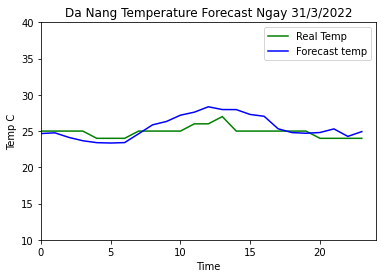

In [12]:
plt.plot(real_temp, color = 'green', label = 'Real Temp')
plt.plot(lsttemperature_forecast, color = 'blue', label = 'Forecast temp')
plt.axis((0,24,10,40))
plt.title('Da Nang Temperature Forecast Ngay 31/3/2022')
plt.xlabel('Time')
plt.ylabel('Temp C')
plt.legend()
plt.show()

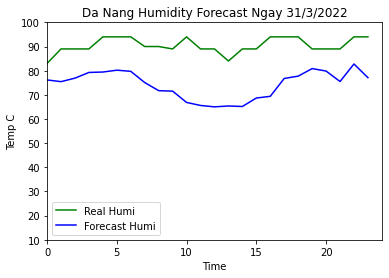

In [13]:
plt.plot(real_humi, color = 'green', label = 'Real Humi')
plt.plot(lsthumidity_forecast, color = 'blue', label = 'Forecast Humi')
plt.axis((0,24,10,100))
plt.title('Da Nang Humidity Forecast Ngay 31/3/2022')
plt.xlabel('Time')
plt.ylabel('Temp C')
plt.legend()
plt.show()

In [14]:
print(real_temp.mean())
print(real_humi.mean())

24.875
90.5


In [15]:
print(mean_absolute_error(lsttemperature_forecast, real_temp)) 
print(mean_absolute_error(lsthumidity_forecast, real_humi)) 

1.0715897379478496
16.238567581131168
